In [1]:
import matplotlib.pyplot as plt
from uniswap_fee_and_divergence import *
# Show all colums of a pandas dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Load data
dataset = pd.read_csv("Backtest_ready_ETHUSDT_1H.csv", index_col=0, parse_dates=True)

# Fee multiplier estimation
def estimate_conc_liq_fee_multipler(range_pct: float) -> float:
    return USD_FEE_PER_VOLUME * (6 / range_pct)

INITIAL_CAPITAL_USD = 150_000
EXCHANGE_FEE = 0.0002
IS_HEDGED = True
RANGE_PCTS = 6
SWAP_FEE = 0.003
SLIPPAGE = 0.005
# 2.01$ from $100 principal over last 10 days (May 28th - June 7th)
# Get last 10 day's cumulative volume
VOLUME_SUM = dataset["volume"]["2023-05-28":"2023-06-08"].sum() # type: ignore
USD_FEE_CAPITAL_MULTIPLIER = INITIAL_CAPITAL_USD/100
USD_FEE_PER_VOLUME = 2.01 / VOLUME_SUM
USD_FEE_PER_VOLUME = USD_FEE_PER_VOLUME * USD_FEE_CAPITAL_MULTIPLIER


Backtest results:
Initial capital: 150000 USD
Range pct: 6
Fee per volume: 1.6466573667165954e-05
Exchange fee: 0.0002
Number of positions: 130
Number of data points in backtest: 9783
Total days in backtest: 407.625
Total fees received: 190331.22009034216
Final capital: 121059.53443730567
Final ROI: -19.29%


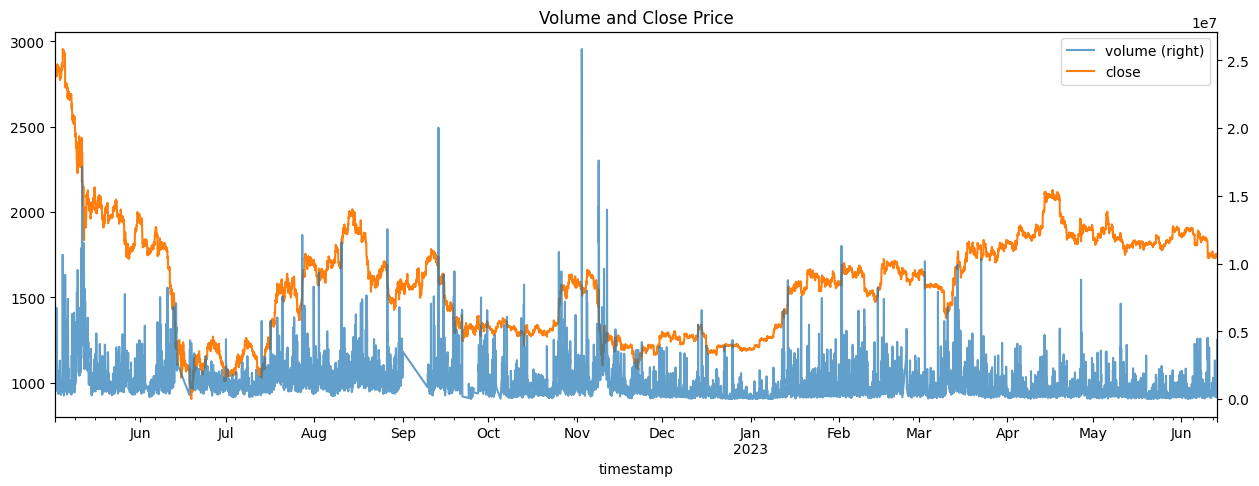

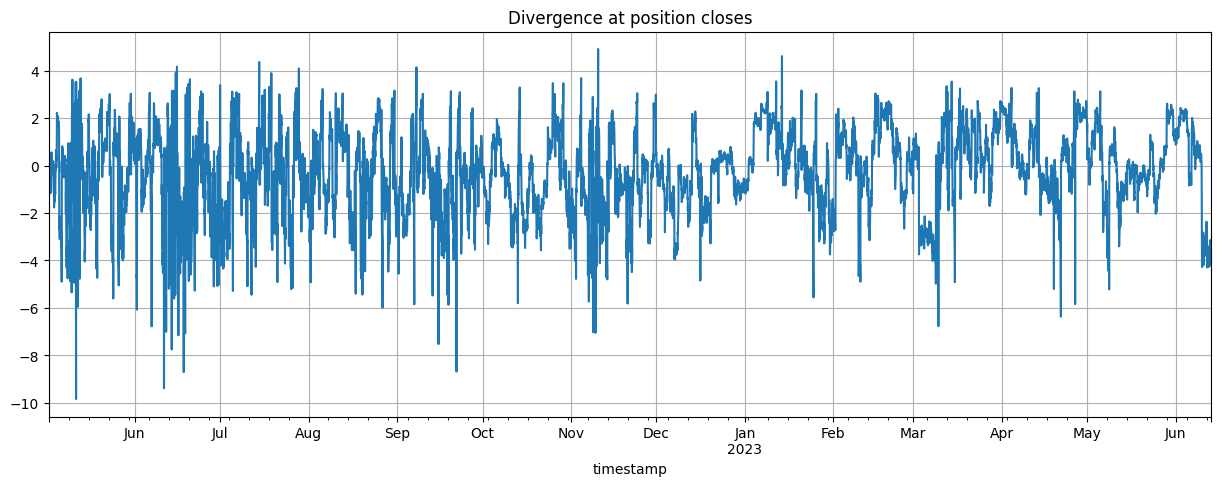

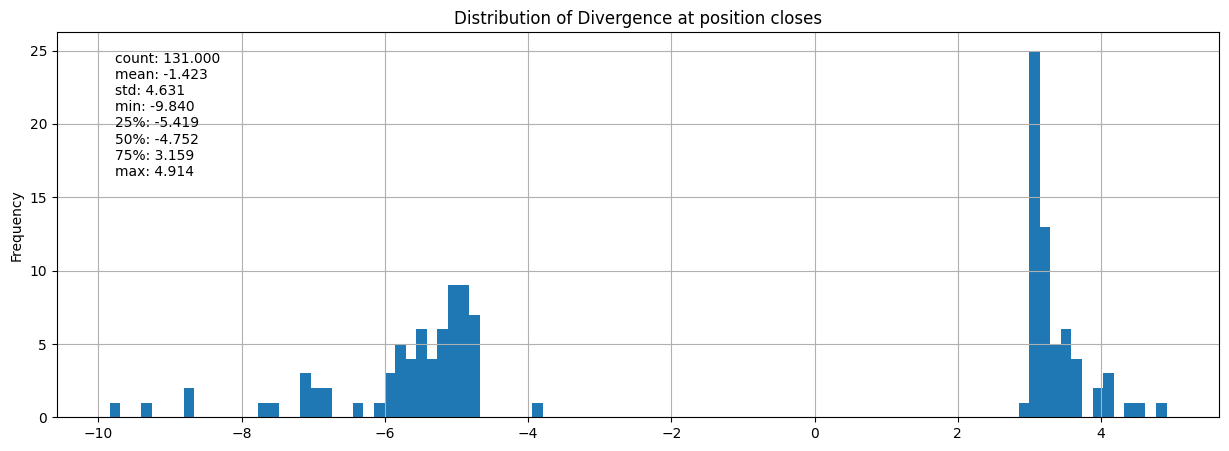

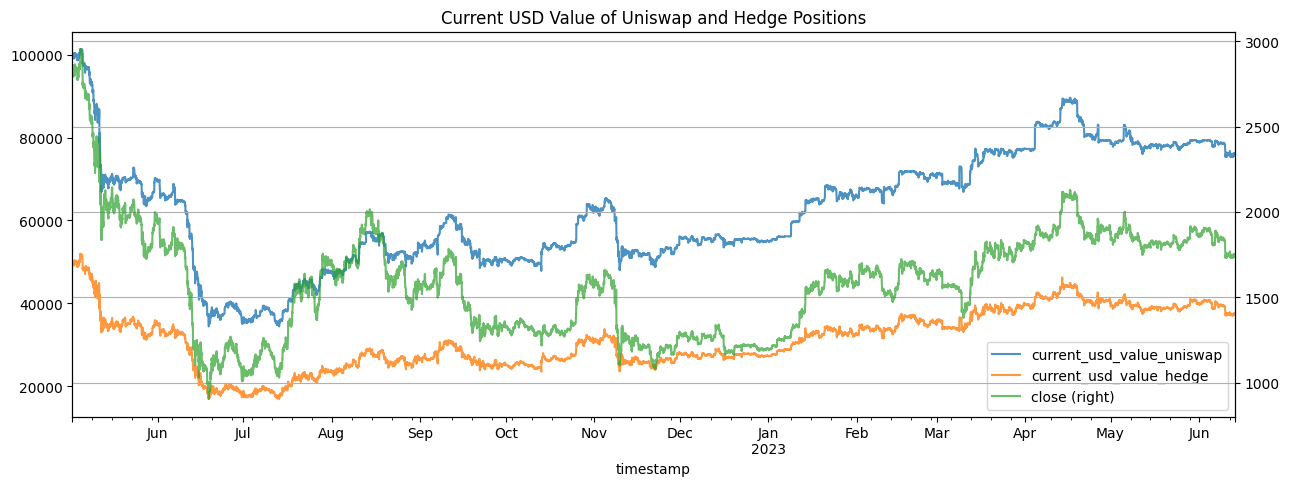

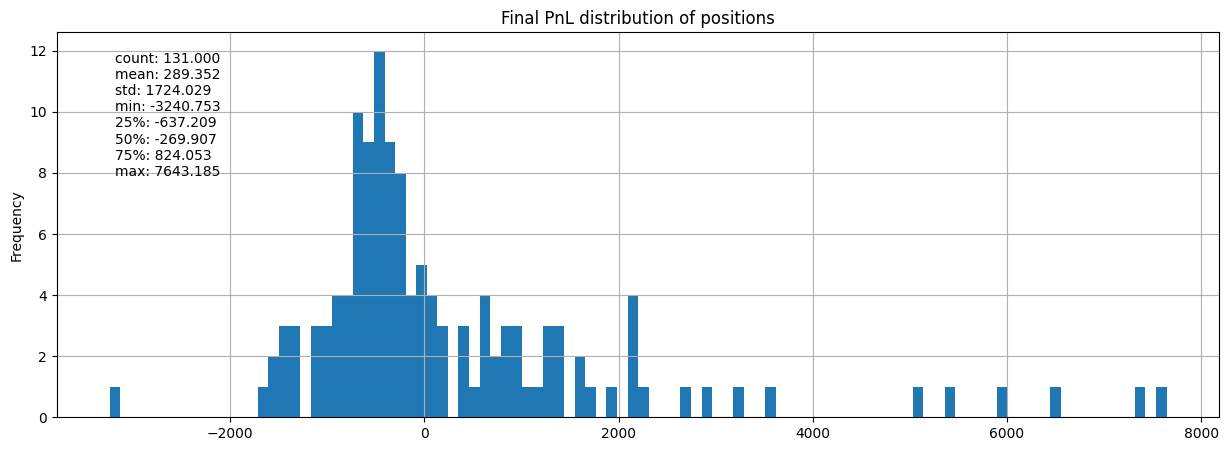

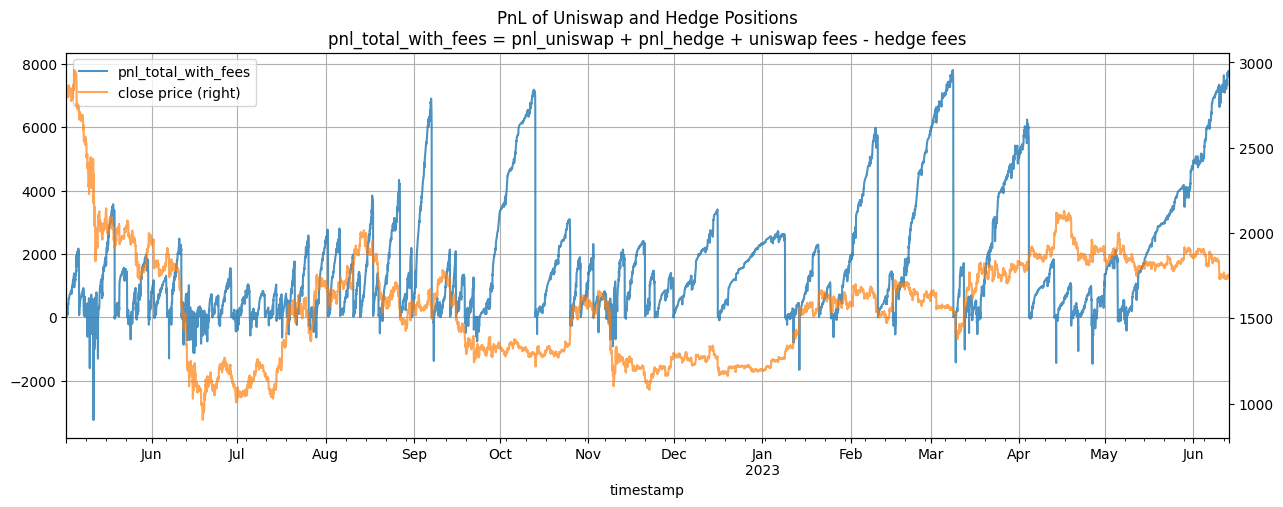

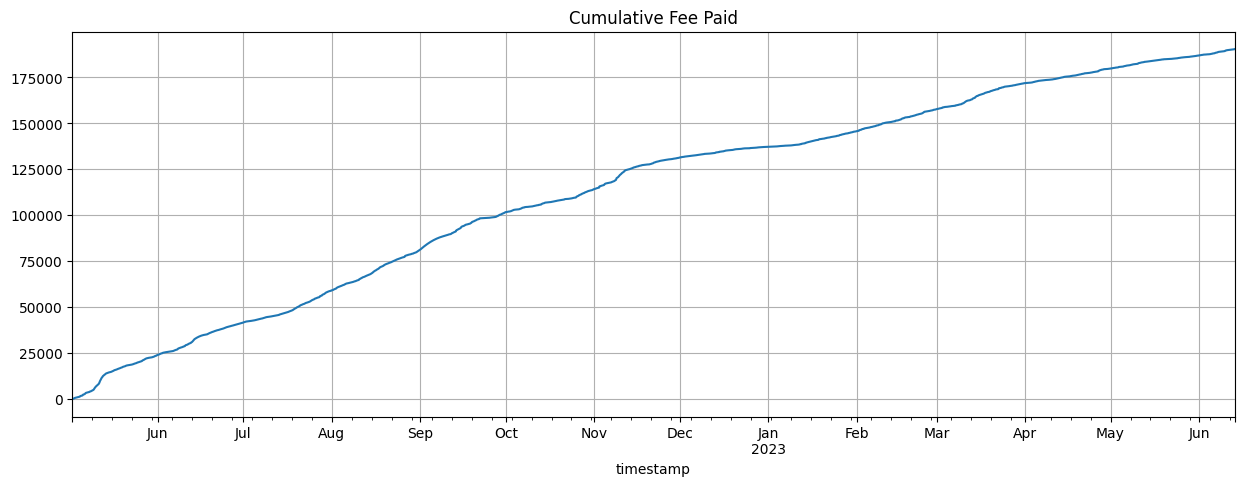

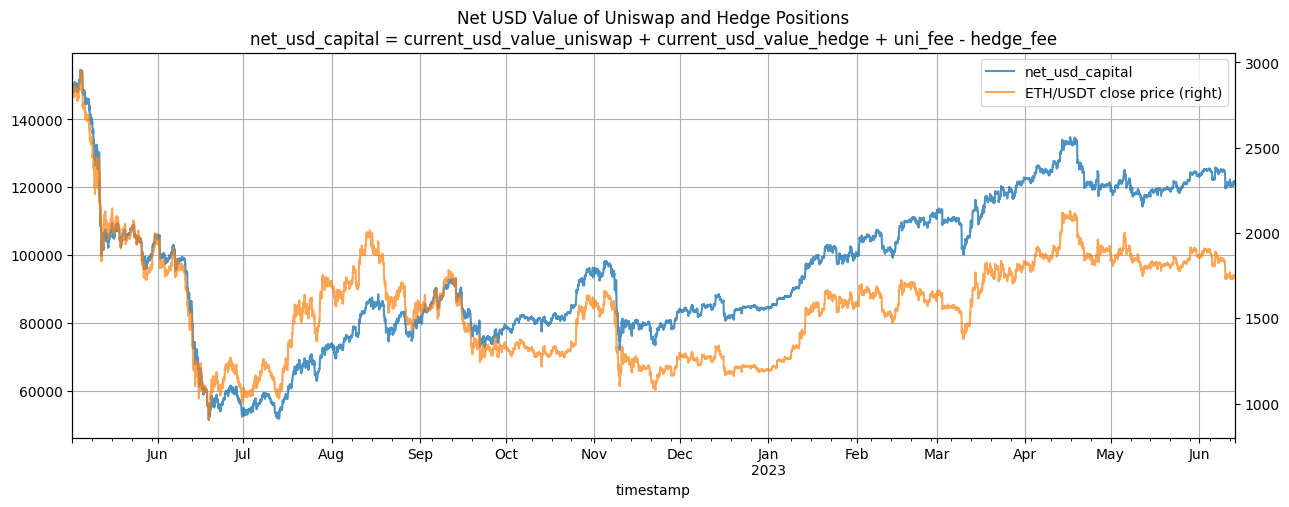

In [3]:
# Run backtest
backtester = DataBacktester(
    data=dataset, 
    capital_usd=INITIAL_CAPITAL_USD, 
    range_pct=RANGE_PCTS, 
    fee_per_volume=estimate_conc_liq_fee_multipler(RANGE_PCTS),
    exchange_fee=EXCHANGE_FEE,
    is_hedged=IS_HEDGED,
    slippage=SLIPPAGE,
    swap_fee=SWAP_FEE,
)

# Run backtest
backtester.run()

# Print backtest results
print(f"Backtest results:")
print(f"Initial capital: {INITIAL_CAPITAL_USD} USD")
print(f"Range pct: {backtester.range_pct}")
print(f"Fee per volume: {backtester.fee_per_volume}")
print(f"Exchange fee: {backtester.exchange_fee}")
print(f"Number of positions: {len(backtester.positions)}")
print(f"Number of data points in backtest: {len(backtester.data)}")
print(f"Total days in backtest: {len(backtester.data)/24}")
print(f"Total fees received: {backtester.backtest_df.fee.sum()}")
print(f"Final capital: {backtester.backtest_df.net_usd_capital.iloc[-1]}")
print(f"Final ROI: {round((backtester.backtest_df.net_usd_capital.iloc[-1]/INITIAL_CAPITAL_USD*100) - 100, 2)}%")
backtester.plot_backtest()

In [4]:
# Calculate diff between values of this list: backtester.backtest_df.id.unique()
print("Frequency of positions in hours")
pd.DataFrame(backtester.backtest_df.open_timestamp.unique()).diff().describe()

Frequency of positions in hours


,0
count,130
mean,2 days 20:37:23.076923076
std,4 days 05:10:16.681383776
min,0 days 01:00:00
25%,0 days 12:00:00
50%,1 days 06:00:00
75%,3 days 18:15:00
max,23 days 14:00:00


In [5]:
backtester.backtest_df

,open,high,low,close,volume,id,fee,fee_cumm,divergence,pnl_uniswap,pnl_hedge,pnl_total,pnl_total_with_fees,current_usd_value_uniswap,current_usd_value_hedge,net_usd_capital,swap_fee,slippage,amount_token0,amount_token1,upper_range,lower_range,open_timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00,2824.81,2849.68,2822.59,2841.41,1.791290e+06,0,29.496412,29.496412,-1.887379e-15,0.000000,0.000000,0.000000,19.496412,100000.000000,50000.000000,149619.496412,150.000000,250.000000,50000.000000,17.596897,3011.8946,2680.575472,2022-05-02 00:00:00
2022-05-02 01:00:00,2841.66,2848.22,2833.04,2834.21,5.400860e+05,0,8.893365,38.389777,-1.707960e-03,-129.496398,126.697661,-2.798738,25.591039,99870.503602,49873.302339,149372.195718,150.000000,250.000000,47792.411084,18.374818,3011.8946,2680.575472,2022-05-02 00:00:00
2022-05-02 02:00:00,2834.21,2841.00,2829.01,2839.15,7.166324e+05,0,11.800480,50.190257,-5.320899e-04,-40.044497,39.768988,-0.275509,39.914748,99959.955503,49960.231012,149560.376772,150.000000,250.000000,49307.363860,17.840759,3011.8946,2680.575472,2022-05-02 00:00:00
2022-05-02 03:00:00,2839.15,2846.21,2835.00,2840.72,5.770002e+05,0,9.501216,59.691472,-1.620626e-04,-12.167533,12.141859,-0.025674,49.665798,99987.832467,49987.858141,149625.382080,150.000000,250.000000,49788.560665,17.671320,3011.8946,2680.575472,2022-05-02 00:00:00
2022-05-02 04:00:00,2840.72,2865.83,2832.10,2856.81,1.076819e+06,0,17.731527,77.423000,3.528209e-03,258.239190,-270.992219,-12.753029,54.669971,100258.239190,50270.992219,150196.654408,150.000000,250.000000,54712.417796,15.942895,3011.8946,2680.575472,2022-05-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-13 10:00:00,1749.63,1751.74,1747.42,1750.98,1.428031e+05,130,2.351479,8325.469434,-3.278013e-02,-2224.918585,1625.090527,-599.828057,7717.811410,76074.741867,37524.739699,121603.922391,117.449491,195.749151,10552.174029,37.420512,1936.4186,1723.405660,2023-05-08 17:00:00
2023-06-13 11:00:00,1750.99,1755.29,1746.32,1753.81,5.366189e+05,130,8.836275,8334.305709,-3.136949e-02,-2119.889555,1564.441626,-555.447929,7771.027813,76179.770896,37585.388600,121778.436597,117.449491,195.749151,11630.444936,36.805199,1936.4186,1723.405660,2023-05-08 17:00:00
2023-06-13 12:00:00,1753.80,1770.13,1728.88,1741.89,4.372443e+06,130,71.999155,8406.304864,-3.741169e-02,-2574.088055,1819.895656,-754.192399,7644.282499,75725.572397,37329.934570,121140.783223,117.449491,195.749151,7082.845263,39.407039,1936.4186,1723.405660,2023-05-08 17:00:00


In [6]:
backtester.backtest_df[backtester.backtest_df.id == 0]

,open,high,low,close,volume,id,fee,fee_cumm,divergence,pnl_uniswap,pnl_hedge,pnl_total,pnl_total_with_fees,current_usd_value_uniswap,current_usd_value_hedge,net_usd_capital,swap_fee,slippage,amount_token0,amount_token1,upper_range,lower_range,open_timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,,,
2022-05-02 00:00:00,2824.81,2849.68,2822.59,2841.41,1.791290e+06,0,29.496412,29.496412,-1.887379e-15,0.000000,0.000000,0.000000,19.496412,100000.000000,50000.000000,149619.496412,150.0,250.0,50000.000000,17.596897,3011.8946,2680.575472,2022-05-02
2022-05-02 01:00:00,2841.66,2848.22,2833.04,2834.21,5.400860e+05,0,8.893365,38.389777,-1.707960e-03,-129.496398,126.697661,-2.798738,25.591039,99870.503602,49873.302339,149372.195718,150.0,250.0,47792.411084,18.374818,3011.8946,2680.575472,2022-05-02
2022-05-02 02:00:00,2834.21,2841.00,2829.01,2839.15,7.166324e+05,0,11.800480,50.190257,-5.320899e-04,-40.044497,39.768988,-0.275509,39.914748,99959.955503,49960.231012,149560.376772,150.0,250.0,49307.363860,17.840759,3011.8946,2680.575472,2022-05-02
2022-05-02 03:00:00,2839.15,2846.21,2835.00,2840.72,5.770002e+05,0,9.501216,59.691472,-1.620626e-04,-12.167533,12.141859,-0.025674,49.665798,99987.832467,49987.858141,149625.382080,150.0,250.0,49788.560665,17.671320,3011.8946,2680.575472,2022-05-02
2022-05-02 04:00:00,2840.72,2865.83,2832.10,2856.81,1.076819e+06,0,17.731527,77.423000,3.528209e-03,258.239190,-270.992219,-12.753029,54.669971,100258.239190,50270.992219,150196.654408,150.0,250.0,54712.417796,15.942895,3011.8946,2680.575472,2022-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06 07:00:00,2743.16,2746.53,2694.09,2730.20,2.858338e+06,0,47.067035,2673.992399,-3.062760e-02,-2637.188437,1956.950950,-680.237487,1983.754913,97362.811563,48043.049050,147669.853012,150.0,250.0,15583.445204,29.953617,3011.8946,2680.575472,2022-05-02
2022-05-06 08:00:00,2730.21,2744.88,2717.05,2719.52,3.293267e+06,0,54.228827,2728.221226,-3.405681e-02,-2963.635647,2144.885814,-818.749834,1899.471392,97036.364353,47855.114186,147209.699765,150.0,250.0,12241.674534,31.180021,3011.8946,2680.575472,2022-05-02
2022-05-06 09:00:00,2719.51,2738.44,2717.81,2732.69,8.880314e+05,0,14.622835,2742.844061,-2.984062e-02,-2562.958707,1913.134676,-649.824031,2083.020030,97437.041293,48086.865324,147856.750677,150.0,250.0,16361.625816,29.668720,3011.8946,2680.575472,2022-05-02


In [7]:
# Count number of positions with positive pnl_total_with_fees
backtester.backtest_df[backtester.backtest_df.pnl_total_with_fees > 0].id.nunique()

123

In [8]:
# Count number of positions with negative pnl_total_with_fees
positive = backtester.backtest_df.groupby("id").last().pnl_total_with_fees[backtester.backtest_df.groupby("id").last().pnl_total_with_fees > 0].count()
negative = backtester.backtest_df.groupby("id").last().pnl_total_with_fees[backtester.backtest_df.groupby("id").last().pnl_total_with_fees < 0].count()

print(f"Positive: {positive}")
print(f"Negative: {negative}")


Positive: 52
Negative: 79


In [9]:
backtester.backtest_df.id.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130])

<Axes: xlabel='timestamp'>

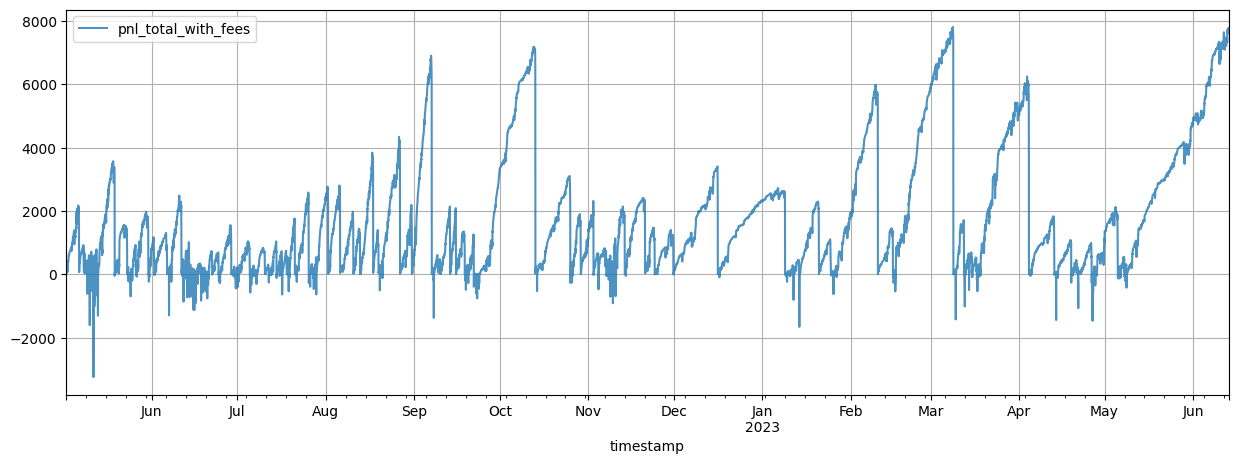

In [10]:
backtester.backtest_df.plot(
            y="pnl_total_with_fees",
            alpha=0.8,
            figsize=(15, 5),
            grid=True,
        )